# **WORKFLOW - Computational Drug Discovery**

by Joana Paula da Silva Oliveira

### **Installing and starting the RDKIT environment**

In [ ]:
! conda info

In [ ]:
# If necessary, install Miniconda
# ! wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
# ! echo 'jp' | sudo -S chmod +x Miniconda3-latest-Linux-x86_64.sh
# ! echo 'jp' | sudo -S bash Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
# ! conda create -c conda-forge -n my-rdkit-env rdkit -y
# ! conda activate my-rdkit-env

In [ ]:
# Update RDKIT environment
! conda update -n base -c defaults conda -y

## **Installing libraries**

In [ ]:
# CHEMBL
! pip install chembl_webresource_client
! pip install pandas
! pip install numpy

## **Importing libraries**

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

### **Target search for CDK6**

In [3]:
# Target search for CDK6
target = new_client.target
target_query = target.search('cdk6')
targets = pd.DataFrame.from_dict(target_query)
targets.to_csv("list_targets_CDK6_CHEMBL.csv", sep="\t")
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,VHL/CDK6,15.0,False,CHEMBL4523739,"[{'accession': 'Q00534', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
1,[],Homo sapiens,CDK6/cyclin D3,13.0,False,CHEMBL2111448,"[{'accession': 'P30281', 'component_descriptio...",PROTEIN COMPLEX,9606
2,[],Homo sapiens,CDK6/cyclin D1,13.0,False,CHEMBL2111455,"[{'accession': 'P24385', 'component_descriptio...",PROTEIN COMPLEX,9606
3,[],Homo sapiens,CDK6/cyclin D2,13.0,False,CHEMBL3301386,"[{'accession': 'Q00534', 'component_descriptio...",PROTEIN COMPLEX,9606
4,"[{'xref_id': 'Q00534', 'xref_name': None, 'xre...",Homo sapiens,Cyclin-dependent kinase 6,12.0,False,CHEMBL2508,"[{'accession': 'Q00534', 'component_descriptio...",SINGLE PROTEIN,9606
5,[],Homo sapiens,Protein cereblon/Cyclin-dependent kinase 6,11.0,False,CHEMBL4523700,"[{'accession': 'Q00534', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
6,[],Homo sapiens,Cyclin-dependent kinase 4/6,10.0,False,CHEMBL3885553,"[{'accession': 'P11802', 'component_descriptio...",PROTEIN FAMILY,9606
7,[],Homo sapiens,Protein cereblon/CDK6/G1/S-specific cyclin-D3,10.0,False,CHEMBL4523716,"[{'accession': 'P30281', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
8,[],Mus musculus,Cereblon/Cyclin-dependent kinase 6,10.0,False,CHEMBL4802029,"[{'accession': 'Q8C7D2', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,10090
9,[],Homo sapiens,E3 ubiquitin-protein ligase Mdm2/CDK6,9.0,False,CHEMBL4523718,"[{'accession': 'Q00987', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606


### **Select and retrieve bioactivity data for target protein**

We will assign the entry which corresponds to the target protein to the ***selected_target*** variable 

In [4]:
selected_target = targets.target_chembl_id[4]
selected_target

'CHEMBL2508'

Here, we will retrieve only bioactivity data for the target protein that are reported as IC50 values in nM (nanomolar) unit.

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)

In [7]:
df.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1407654,[],CHEMBL832923,Inhibition of human cyclin-dependent kinase 6 ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclin-dependent kinase 6,9606,None,None,IC50,uM,UO_0000065,None,0.85
1,None,1407658,[],CHEMBL832923,Inhibition of human cyclin-dependent kinase 6 ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclin-dependent kinase 6,9606,None,None,IC50,uM,UO_0000065,None,1.7
2,None,1407662,[],CHEMBL832923,Inhibition of human cyclin-dependent kinase 6 ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cyclin-dependent kinase 6,9606,None,None,IC50,uM,UO_0000065,None,22.0


Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [ ]:
df.to_csv('bioactivity_data_raw.csv', index = False)

## **Handling missing data**
If any compounds has missing value for the **standard_value** column then drop it

In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df[df.canonical_smiles.notna()]
df2.to_csv("ic50_bioactivity_compounds_filtered.csv", index=False)


## **Data pre-processing of the bioactivity data**

### **Labeling compounds as either being active, inactive or intermediate**

In [8]:
bio_class = []

df3 = pd.read_csv("./ic50_bioactivity_compounds_filtered.csv")

for row in df3.standard_value:
  if float(row) >= 10000:
   bio_class.append("inactive")
  elif float(row) <= 1000:
    bio_class.append("active")
  else:
    bio_class.append("intermediate")

df3.insert(0, "bio_class", bio_class)

df3.head(3)




,bio_class,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,active,NaN,1407654,[],CHEMBL832923,Inhibition of human cyclin-dependent kinase 6 ...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 6,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.85
1,intermediate,NaN,1407658,[],CHEMBL832923,Inhibition of human cyclin-dependent kinase 6 ...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 6,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1.70
2,inactive,NaN,1407662,[],CHEMBL832923,Inhibition of human cyclin-dependent kinase 6 ...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Cyclin-dependent kinase 6,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,22.00


<!-- ### **Combine the 4 columns (molecule_chembl_id,canonical_smiles,standard_value and bio_class) into a DataFrame** -->

In [9]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value','bio_class']
df4 = df3[selection]
df4.head(3)

,molecule_chembl_id,canonical_smiles,standard_value,bio_class
0,CHEMBL31574,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)ccc12,850.0,active
1,CHEMBL28,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,1700.0,intermediate
2,CHEMBL150,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,22000.0,inactive


In [ ]:
# bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
# df4 = pd.concat([df3, bioactivity_class], axis=1)
# df4

Saves dataframe to CSV file

In [ ]:
df4.to_csv('bioactivity_data_preprocessed.csv', index = False)

---

Remove SMILES column

In [10]:
df_no_smiles = df4.drop(columns='canonical_smiles')
df_no_smiles.head(3)

,molecule_chembl_id,standard_value,bio_class
0,CHEMBL31574,850.0,active
1,CHEMBL28,1700.0,intermediate
2,CHEMBL150,22000.0,inactive


Cleaning SMILES list and selecting the longes option

In [11]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,bio_class,canonical_smiles
0,CHEMBL31574,850.0,active,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)ccc12
1,CHEMBL28,1700.0,intermediate,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12
2,CHEMBL150,22000.0,inactive,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12
3,CHEMBL428690,80.0,active,CN1CC[C@H](c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc...
4,CHEMBL50,25000.0,inactive,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12
...,...,...,...,...
405,CHEMBL4876497,1000.0,active,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...
406,CHEMBL4786559,1000.0,active,COC[C@H](C)N[C@H]1CC[C@H](Nc2cc(-c3cccc(NCC4(C...
407,CHEMBL4088216,1000.0,active,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...
408,CHEMBL4549667,1000.0,active,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

- Molecular weight < 500 Dalton
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

### **Import libraries**

In [12]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [13]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData = np.arange(1,1)
    i = 0  
    for mol in moldata:
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])
    
        if(i == 0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i = i + 1
    
    columnNames = ["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data = baseData,columns = columnNames)
    
    return descriptors

In [24]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,286.239,2.28240,4.0,6.0
1,270.240,2.57680,3.0,5.0
2,286.239,2.28240,4.0,6.0
3,401.846,3.30460,3.0,6.0
4,302.238,1.98800,5.0,7.0
...,...,...,...,...
405,378.863,4.73222,3.0,4.0
406,513.086,4.87688,3.0,8.0
407,402.454,2.35370,0.0,5.0
408,481.350,3.11620,0.0,5.0


In [25]:
df_clean_smiles

,molecule_chembl_id,standard_value,bio_class,canonical_smiles
0,CHEMBL31574,850.0,active,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)ccc12
1,CHEMBL28,1700.0,intermediate,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12
2,CHEMBL150,22000.0,inactive,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12
3,CHEMBL428690,80.0,active,CN1CC[C@H](c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc...
4,CHEMBL50,25000.0,inactive,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12
...,...,...,...,...
405,CHEMBL4876497,1000.0,active,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...
406,CHEMBL4786559,1000.0,active,COC[C@H](C)N[C@H]1CC[C@H](Nc2cc(-c3cccc(NCC4(C...
407,CHEMBL4088216,1000.0,active,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...
408,CHEMBL4549667,1000.0,active,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...


In [26]:
df_combined = pd.concat([df_clean_smiles,df_lipinski], axis=1)
df_combined.head(3)

,molecule_chembl_id,standard_value,bio_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL31574,850.0,active,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)ccc12,286.239,2.2824,4.0,6.0
1,CHEMBL28,1700.0,intermediate,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,270.240,2.5768,3.0,5.0
2,CHEMBL150,22000.0,inactive,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,286.239,2.2824,4.0,6.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [27]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x
     


Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [28]:
df_combined.standard_value.describe() 

count       402.000000
mean       3051.954254
std       21911.921334
min           0.360000
25%           9.050000
50%          22.000000
75%         110.750000
max      300000.000000
Name: standard_value, dtype: float64

In [29]:
-np.log10((10**-9)* 100000000)

1.0

In [30]:
-np.log10((10**-9)* 10000000000)

-1.0

In [31]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [32]:
df_norm = norm_value(df_combined)
df_norm

/tmp/ipykernel_16520/3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,bio_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL31574,active,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)ccc12,286.239,2.28240,4.0,6.0,850.0
1,CHEMBL28,intermediate,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,270.240,2.57680,3.0,5.0,1700.0
2,CHEMBL150,inactive,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,286.239,2.28240,4.0,6.0,22000.0
3,CHEMBL428690,active,CN1CC[C@H](c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc...,401.846,3.30460,3.0,6.0,80.0
4,CHEMBL50,inactive,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,302.238,1.98800,5.0,7.0,25000.0
...,...,...,...,...,...,...,...,...
405,CHEMBL4876497,active,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,378.863,4.73222,3.0,4.0,1000.0
406,CHEMBL4786559,active,COC[C@H](C)N[C@H]1CC[C@H](Nc2cc(-c3cccc(NCC4(C...,513.086,4.87688,3.0,8.0,1000.0
407,CHEMBL4088216,active,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,402.454,2.35370,0.0,5.0,1000.0
408,CHEMBL4549667,active,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,481.350,3.11620,0.0,5.0,1000.0


In [33]:
df_norm.standard_value_norm.describe()

count       402.000000
mean       3051.954254
std       21911.921334
min           0.360000
25%           9.050000
50%          22.000000
75%         110.750000
max      300000.000000
Name: standard_value_norm, dtype: float64

In [34]:
df_final = pIC50(df_norm)
df_final.head(10)

/tmp/ipykernel_16520/1353033954.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,bio_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL31574,active,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)ccc12,286.239,2.28240,4.0,6.0,6.070581
1,CHEMBL28,intermediate,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,270.240,2.57680,3.0,5.0,5.769551
2,CHEMBL150,inactive,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,286.239,2.28240,4.0,6.0,4.657577
3,CHEMBL428690,active,CN1CC[C@H](c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc...,401.846,3.30460,3.0,6.0,7.096910
4,CHEMBL50,inactive,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,302.238,1.98800,5.0,7.0,4.602060
5,CHEMBL151,inactive,O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,286.239,2.28240,4.0,6.0,3.522879
6,CHEMBL117,intermediate,O=c1cc(-c2ccccc2)oc2cc(O)cc(O)c12,254.241,2.87120,2.0,4.0,5.221849
7,CHEMBL210540,active,Cc1cc(-c2cnc(Nc3cnc(CN4CCN(C)CC4)cn3)s2)nc(OC2...,480.642,3.90102,1.0,10.0,8.107905
8,CHEMBL336242,intermediate,O=C(Nc1cc(CN[C@H]2Cc3ccc(Cl)cc3C2)n[nH]1)Nc1cc...,476.968,4.25480,4.0,4.0,NaN
9,CHEMBL141247,active,O=C(Nc1ccccn1)Nc1cccc2c1[C@H]1CCCN1C2=O,308.341,3.01630,2.0,3.0,7.148742


In [35]:
df_final.pIC50.describe()

count    402.000000
mean       7.363404
std        1.071320
min        3.522879
25%        6.955660
50%        7.657577
75%        8.043371
max        9.443697
Name: pIC50, dtype: float64

In [36]:
df_final.to_csv('cdk6_bioactivity_data_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [37]:
df_2class = df_final[df_final.bio_class != 'intermediate']
df_2class

,molecule_chembl_id,bio_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL31574,active,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)ccc12,286.239,2.28240,4.0,6.0,6.070581
2,CHEMBL150,inactive,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,286.239,2.28240,4.0,6.0,4.657577
3,CHEMBL428690,active,CN1CC[C@H](c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc...,401.846,3.30460,3.0,6.0,7.096910
4,CHEMBL50,inactive,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,302.238,1.98800,5.0,7.0,4.602060
5,CHEMBL151,inactive,O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,286.239,2.28240,4.0,6.0,3.522879
...,...,...,...,...,...,...,...,...
405,CHEMBL4876497,active,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,378.863,4.73222,3.0,4.0,6.000000
406,CHEMBL4786559,active,COC[C@H](C)N[C@H]1CC[C@H](Nc2cc(-c3cccc(NCC4(C...,513.086,4.87688,3.0,8.0,6.000000
407,CHEMBL4088216,active,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,402.454,2.35370,0.0,5.0,6.000000
408,CHEMBL4549667,active,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,481.350,3.11620,0.0,5.0,6.000000


In [38]:
df_2class.to_csv('cdk6_no_int_bioactivity_data_pIC50.csv')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [39]:
# ! pip install seaborn
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

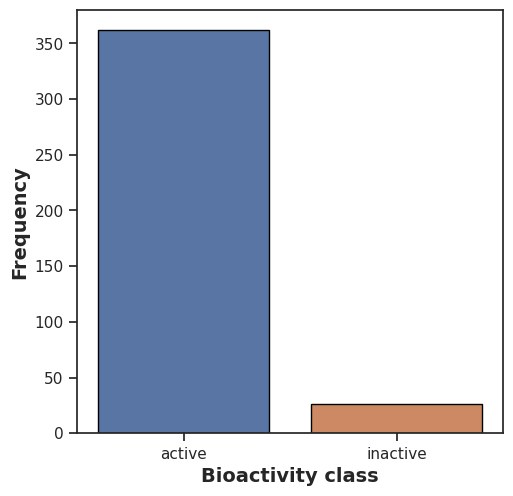

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bio_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bio_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

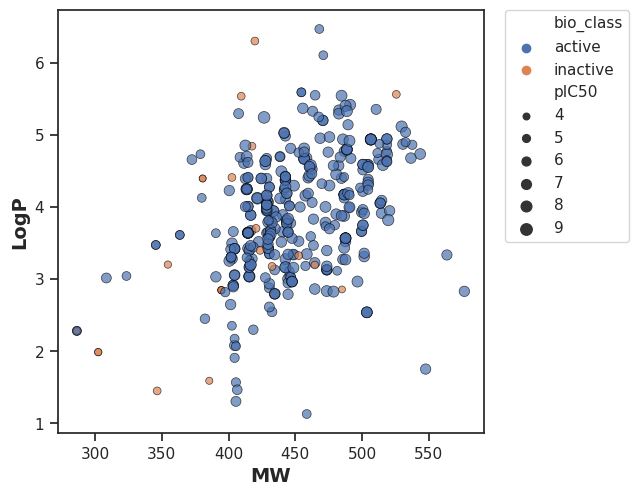

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bio_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

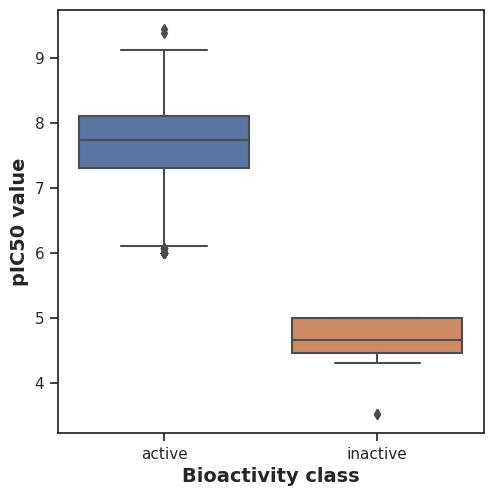

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bio_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [44]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bio_class']
  df = df_2class[selection]
  active = df[df.bio_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bio_class']
  df = df_2class[selection]
  inactive = df[df.bio_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [45]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,9412.0,1.601282e-17,0.05,Different distribution (reject H0)


#### **MW**

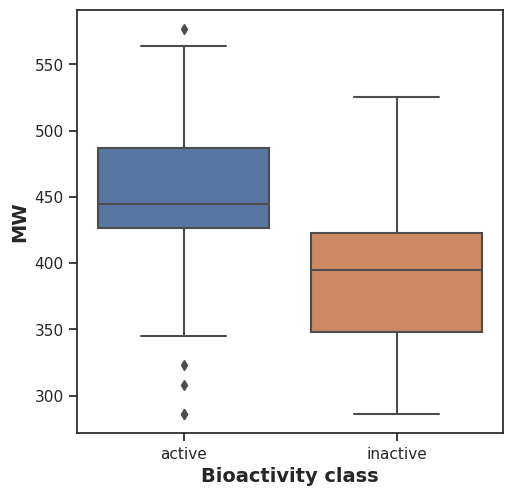

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bio_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [47]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,7604.5,1.548032e-07,0.05,Different distribution (reject H0)


#### **LogP**

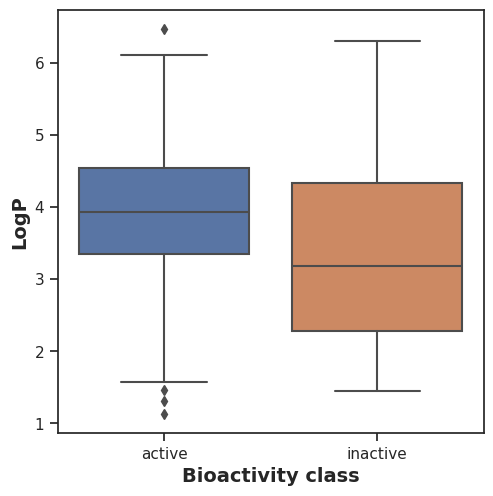

In [48]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bio_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [49]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,6329.0,0.00331,0.05,Different distribution (reject H0)


#### **NumHDonors**

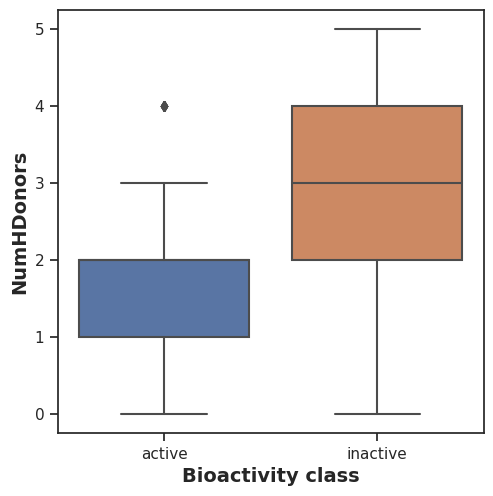

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bio_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [51]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2994.5,0.000755,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

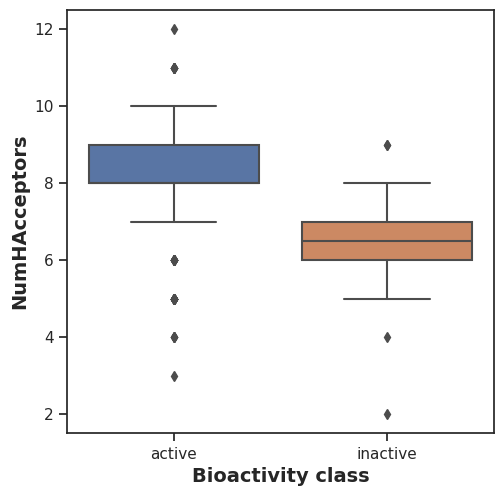

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bio_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [53]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,7697.5,1.606541e-08,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

#### **Box Plots**

##### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

##### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), all exhibited ***statistically significant difference*** between **actives** and **inactives**.

## **Download PaDEL-Descriptor**

In [54]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-12-05 14:26:06--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-12-05 14:26:06--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8003::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24,57M  23,6MB/s    in 1,0s    

2022-12-05 14:26:09 (23,6 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-12-05 14:26:0

In [55]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [210]:
df_2class
df_2class.to_csv("df_2class.csv")

In [57]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df_2class[selection]
df3_selection.to_csv('molecule.smi', sep = '\t', index = False, header = False)

In [58]:
! cat molecule.smi | head -5

O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)ccc12	CHEMBL31574
O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12	CHEMBL150
CN1CC[C@H](c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc23)[C@H](O)C1	CHEMBL428690
O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12	CHEMBL50
O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12	CHEMBL151


In [59]:
! cat molecule.smi | wc -l

388


## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

In [60]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [62]:
! bash padel.sh

Processing CHEMBL31574 in molecule.smi (1/388). 
Processing CHEMBL50 in molecule.smi (4/388). 
Processing CHEMBL151 in molecule.smi (5/388). 
Processing CHEMBL210540 in molecule.smi (6/388). 
Processing CHEMBL150 in molecule.smi (2/388). 
Processing CHEMBL428690 in molecule.smi (3/388). 
Processing CHEMBL141247 in molecule.smi (7/388). 
Processing CHEMBL215803 in molecule.smi (8/388). 
Processing CHEMBL189963 in molecule.smi (9/388). 
Processing CHEMBL1916359 in molecule.smi (10/388). 
Processing CHEMBL1171238 in molecule.smi (11/388). 
Processing CHEMBL2205766 in molecule.smi (12/388). 
Processing CHEMBL215803 in molecule.smi (13/388). Average speed: 1,52 s/mol.
Processing CHEMBL151 in molecule.smi (15/388). Average speed: 0,54 s/mol.
Processing CHEMBL50 in molecule.smi (14/388). Average speed: 1,53 s/mol.
Processing CHEMBL150 in molecule.smi (16/388). Average speed: 0,41 s/mol.
Processing CHEMBL428690 in molecule.smi (17/388). Average speed: 0,33 s/mol.
Processing CHEMBL2426391 in mo

In [ ]:
! ls -l

## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [63]:
df3_X = pd.read_csv('descriptors_output.csv')

In [64]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL2205766,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1171238,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL50,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL150,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL141247,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,CHEMBL4876497,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384,CHEMBL4088216,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
385,CHEMBL4097778,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
386,CHEMBL4868141,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
384,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
385,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
386,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y variable**

### **Convert IC50 to pIC50**

In [66]:
df3_Y = df_2class['pIC50']
df3_Y

0      6.070581
2      4.657577
3      7.096910
4      4.602060
5      3.522879
         ...   
405    6.000000
406    6.000000
407    6.000000
408    6.000000
409    6.000000
Name: pIC50, Length: 388, dtype: float64

## **Combining X and Y variable**

In [211]:
dataset3 = pd.concat([df3_X,df3_Y], axis = 1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.07
1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
2,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.66
3,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.10
4,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00
406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00
407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00
408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00


In [212]:
dataset3 = dataset3.dropna()
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.07
2,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.66
3,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.10
4,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.60
5,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.47
384,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00
385,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.30
386,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.89


In [213]:
dataset3.to_csv('bioactivity_data_pIC50_pubchem_fp.csv', index = False)

## **Regression Models with Random Forest**

In [214]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **3. Input features**

### **3.1. Input features**

In [215]:
X = dataset3.drop('pIC50', axis = 1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
384,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
385,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
386,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### **3.2. Output features**

In [216]:
Y = dataset3.pIC50
Y

0     6.07
2     4.66
3     7.10
4     4.60
5     3.52
      ... 
382   4.47
384   5.00
385   8.30
386   6.89
387   6.44
Name: pIC50, Length: 368, dtype: float64

### **Data dimension**

In [217]:
X.shape

(368, 881)

In [154]:
X = X.dropna()
X.shape

(388, 881)

In [218]:
Y.shape

(368,)

In [157]:
Y = Y.dropna()
Y.shape

(388,)

### **3.4. Remove low variance features**

In [219]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold = (.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [220]:
X.shape

(368, 41)

## **4. Data split (80/20 ratio)**

In [221]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [222]:
X_train.shape, Y_train.shape

((294, 41), (294,))

In [223]:
X_test.shape, Y_test.shape

((74, 41), (74,))

## **5. Building a Regression Model using Random Forest**

In [224]:
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_test, Y_test)
r2 = model.score(X_test, Y_test)
r2

0.7380905024818674

In [225]:
Y_pred = model.predict(X_test)
Y_pred

array([7.63015332, 7.76549369, 8.41710281, 7.26642985, 7.28706018,
       7.91657542, 7.47714355, 7.86811588, 7.75399033, 7.59201827,
       7.12629895, 7.78792121, 7.80768784, 7.36126077, 8.27239581,
       7.19629154, 7.8750111 , 7.91452169, 7.96813989, 7.66534701,
       7.36126077, 5.4464133 , 8.19229478, 7.86811588, 7.53371025,
       7.6503672 , 7.74966026, 7.53689734, 7.68566504, 7.87413244,
       7.67046673, 7.36126077, 8.4238909 , 7.65357518, 7.8346814 ,
       5.25517992, 5.98177216, 7.73230327, 8.41710281, 5.32508836,
       6.74114759, 7.53371025, 7.36126077, 7.83086089, 7.47714355,
       7.96813989, 7.8795157 , 7.12629895, 7.61715281, 8.05737398,
       7.26427207, 6.96294581, 7.7018584 , 7.26642985, 7.482005  ,
       6.37306825, 5.55059323, 4.77582082, 8.13055558, 8.27239581,
       8.17544358, 7.36126077, 7.61572151, 5.15143798, 8.41710281,
       8.11443813, 8.74218645, 5.98177216, 8.63501936, 5.39258687,
       7.96682789, 7.97781968, 7.91452169, 7.47714355])

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

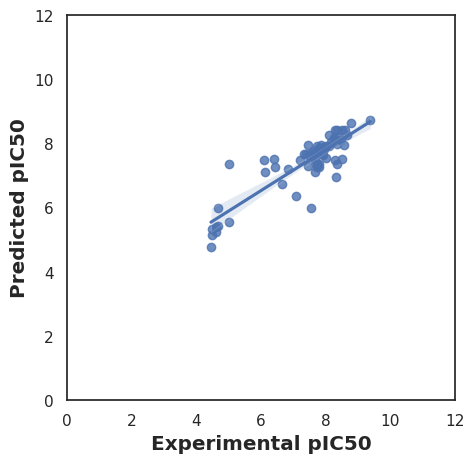

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x = Y_test, y = Y_pred)
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## **Comparing Regressors**

## **1. Import libraries**

In [ ]:
! pip install lazypredict

In [228]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [229]:
df = pd.read_csv('bioactivity_data_pIC50_pubchem_fp.csv')

In [230]:
X = dataset3.drop('pIC50', axis = 1)
X = X.dropna()
Y = dataset3.pIC50
Y = Y.dropna()

## **3. Data pre-processing**

In [231]:
# Examine X dimension
X.shape

(368, 881)

In [232]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(368, 41)

In [233]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## **4. Compare ML algorithms**

In [234]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose = 1, ignore_warnings = True, custom_metric = None)
models_train, predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test, predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 12%|█▏        | 5/42 [00:00<00:00, 44.56it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.23243772647643202, 'Adjusted R-Squared': 0.10755656292696258, 'RMSE': 0.8787112328269724, 'Time taken': 0.036124229431152344}
{'Model': 'BaggingRegressor', 'R-Squared': 0.5991033493046611, 'Adjusted R-Squared': 0.5338781005804194, 'RMSE': 0.6350465804869744, 'Time taken': 0.016556262969970703}
{'Model': 'BayesianRidge', 'R-Squared': 0.18337398960004414, 'Adjusted R-Squared': 0.05051023393973375, 'RMSE': 0.906360503787392, 'Time taken': 0.04044342041015625}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.7002382185135156, 'Adjusted R-Squared': 0.6514674524780162, 'RMSE': 0.5491329432518937, 'Time taken': 0.0060732364654541016}
{'Model': 'DummyRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.1626984126984128, 'RMSE': 1.002973290720737, 'Time taken': 0.012854576110839844}
{'Model': 'ElasticNet', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.1626984126984128, 'RMSE': 1.002973290720737, 'Time taken': 0.017002582550048828}
{'Model': 'Elastic

 24%|██▍       | 10/42 [00:00<00:03,  8.85it/s]

{'Model': 'GammaRegressor', 'R-Squared': 0.1695692450632763, 'Adjusted R-Squared': 0.034459479379126745, 'RMSE': 0.9139892343132, 'Time taken': 0.48131871223449707}
{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.7002382194886552, 'Adjusted R-Squared': 0.6514674536118094, 'RMSE': 0.5491329423587156, 'Time taken': 0.06035566329956055}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.537152599695105, 'Adjusted R-Squared': 0.46184806234391174, 'RMSE': 0.682351706855527, 'Time taken': 0.09509539604187012}


 36%|███▌      | 15/42 [00:02<00:04,  6.26it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.4991708836763622, 'Adjusted R-Squared': 0.4176867814173576, 'RMSE': 0.7097969885895125, 'Time taken': 0.87750244140625}
{'Model': 'HuberRegressor', 'R-Squared': 0.19808661671075567, 'Adjusted R-Squared': 0.06761658212798172, 'RMSE': 0.8981587364232081, 'Time taken': 0.03782486915588379}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.3851678647502833, 'Adjusted R-Squared': 0.2851356522691786, 'RMSE': 0.7864437170022435, 'Time taken': 0.08749127388000488}
{'Model': 'KernelRidge', 'R-Squared': -55.69166950956188, 'Adjusted R-Squared': -64.91531415199061, 'RMSE': 7.55177411736212, 'Time taken': 0.0416102409362793}


 43%|████▎     | 18/42 [00:02<00:02,  8.31it/s]

{'Model': 'Lars', 'R-Squared': 0.12918107940287615, 'Adjusted R-Squared': -0.012499776726021095, 'RMSE': 0.9359513954618967, 'Time taken': 0.03690743446350098}
{'Model': 'LarsCV', 'R-Squared': 0.14527876472028123, 'Adjusted R-Squared': 0.0062169764406443395, 'RMSE': 0.9272601904762229, 'Time taken': 0.05290675163269043}
{'Model': 'Lasso', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.1626984126984128, 'RMSE': 1.002973290720737, 'Time taken': 0.0283660888671875}


 57%|█████▋    | 24/42 [00:02<00:01, 12.46it/s]

{'Model': 'LassoCV', 'R-Squared': 0.1467323292708903, 'Adjusted R-Squared': 0.007907033636392224, 'RMSE': 0.9264713917338384, 'Time taken': 0.19071650505065918}
{'Model': 'LassoLars', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.1626984126984128, 'RMSE': 1.002973290720737, 'Time taken': 0.0072214603424072266}
{'Model': 'LassoLarsCV', 'R-Squared': 0.14527876472028123, 'Adjusted R-Squared': 0.0062169764406443395, 'RMSE': 0.9272601904762229, 'Time taken': 0.0503544807434082}
{'Model': 'LassoLarsIC', 'R-Squared': 0.14209131934164576, 'Adjusted R-Squared': 0.002510938758342074, 'RMSE': 0.9289875611668043, 'Time taken': 0.0360715389251709}
{'Model': 'LinearRegression', 'R-Squared': 0.2463861972636633, 'Adjusted R-Squared': 0.12377442777084657, 'RMSE': 0.8706904678935449, 'Time taken': 0.01179957389831543}
{'Model': 'LinearSVR', 'R-Squared': 0.17213972914254327, 'Adjusted R-Squared': 0.037448177137957006, 'RMSE': 0.9125735740442988, 'Time taken': 0.02528548240661621}


 64%|██████▍   | 27/42 [00:02<00:01, 11.91it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.4213091475151166, 'Adjusted R-Squared': 0.32715706437273473, 'RMSE': 0.7629791613541154, 'Time taken': 0.2371821403503418}
{'Model': 'NuSVR', 'R-Squared': 0.41181192397359356, 'Adjusted R-Squared': 0.3161146576359639, 'RMSE': 0.7692145241577365, 'Time taken': 0.013060808181762695}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.15848247128590798, 'Adjusted R-Squared': 0.021568905106234215, 'RMSE': 0.9200701715810283, 'Time taken': 0.005570888519287109}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.15848247128590798, 'Adjusted R-Squared': 0.021568905106234215, 'RMSE': 0.9200701715810283, 'Time taken': 0.013496637344360352}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.27531828477379516, 'Adjusted R-Squared': -0.48281054539175394, 'RMSE': 1.1326576460764155, 'Time taken': 0.005843639373779297}


 74%|███████▍  | 31/42 [00:04<00:01,  6.42it/s]

{'Model': 'PoissonRegressor', 'R-Squared': 0.2190353100102429, 'Adjusted R-Squared': 0.09197359457540144, 'RMSE': 0.8863496286494463, 'Time taken': 1.0894334316253662}


 79%|███████▊  | 33/42 [00:04<00:01,  4.63it/s]

{'Model': 'QuantileRegressor', 'R-Squared': -0.03881787449942342, 'Adjusted R-Squared': -0.20783189376321864, 'RMSE': 1.0222546029333794, 'Time taken': 0.7952041625976562}
{'Model': 'RANSACRegressor', 'R-Squared': -0.24608920434877013, 'Adjusted R-Squared': -0.4488259399769432, 'RMSE': 1.1196026934965302, 'Time taken': 0.09243583679199219}


 93%|█████████▎| 39/42 [00:05<00:00,  8.23it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.6319260897791115, 'Adjusted R-Squared': 0.5720410488304748, 'RMSE': 0.6084948197366483, 'Time taken': 0.1204080581665039}
{'Model': 'Ridge', 'R-Squared': 0.24562725963345744, 'Adjusted R-Squared': 0.12289201219286905, 'RMSE': 0.8711287782553558, 'Time taken': 0.01303410530090332}
{'Model': 'RidgeCV', 'R-Squared': 0.23945451834011788, 'Adjusted R-Squared': 0.11571497568910527, 'RMSE': 0.8746855725783321, 'Time taken': 0.05986166000366211}
{'Model': 'SGDRegressor', 'R-Squared': 0.23300208712080062, 'Adjusted R-Squared': 0.10821274415235937, 'RMSE': 0.878388131207491, 'Time taken': 0.013089895248413086}
{'Model': 'SVR', 'R-Squared': 0.38267902591386105, 'Adjusted R-Squared': 0.2822418833046082, 'RMSE': 0.7880338704231163, 'Time taken': 0.021567821502685547}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.2463861972636633, 'Adjusted R-Squared': 0.12377442777084657, 'RMSE': 0.8706904678935449, 'Time taken': 0.023328781127929688}
{'Mod

100%|██████████| 42/42 [00:06<00:00,  6.48it/s]


{'Model': 'XGBRegressor', 'R-Squared': 0.7002206154720604, 'Adjusted R-Squared': 0.6514469854496574, 'RMSE': 0.5491490665015112, 'Time taken': 0.48358654975891113}
{'Model': 'LGBMRegressor', 'R-Squared': 0.4757364179387735, 'Adjusted R-Squared': 0.3904395653018279, 'RMSE': 0.7262133246359355, 'Time taken': 0.17484402656555176}
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.1278904683363522, 'Adjusted R-Squared': -0.9894998691076966, 'RMSE': 0.905806097585061, 'Time taken': 0.02711796760559082}
{'Model': 'BaggingRegressor', 'R-Squared': 0.16253600282793956, 'Adjusted R-Squared': -0.910464743548763, 'RMSE': 0.8876316843812229, 'Time taken': 0.014772415161132812}
{'Model': 'BayesianRidge', 'R-Squared': 0.20738956269083675, 'Adjusted R-Squared': -0.8081425601115286, 'RMSE': 0.8635343480525156, 'Time taken': 0.00585174560546875}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.21867054339584402, 'Adjusted R-Squared': -1.780092177121769, 'RMSE': 1.0707618275325068, 'Time taken': 0.005934715270996094}
{'Model': 'DummyRegressor', 'R-Squared': -5.529415626059908e-05, 'Adjusted R-Squared': -1.2813761397939696, 'RMSE': 0.9699776555855641, 'Time taken': 0.0047588348388671875}
{'Model': 'ElasticNet', 'R-Squared': -5.529415626059908e-05, 'Adjusted R-Squared': -1.2813761397939696, 'RMSE': 0.9699776555855641, 'Time taken':

 17%|█▋        | 7/42 [00:00<00:01, 24.71it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.2013336882099761, 'Adjusted R-Squared': -0.821957523770992, 'RMSE': 0.866826952179541, 'Time taken': 0.21932315826416016}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.21164125938718703, 'Adjusted R-Squared': -1.7640566229770203, 'RMSE': 1.0676692879119576, 'Time taken': 0.006338596343994141}
{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.2004404662677055, 'Adjusted R-Squared': -1.7385048136732033, 'RMSE': 1.06272289441273, 'Time taken': 0.11058998107910156}


 29%|██▊       | 12/42 [00:01<00:02, 10.24it/s]

{'Model': 'GammaRegressor', 'R-Squared': 0.21107722562399056, 'Adjusted R-Squared': -0.7997300790452715, 'RMSE': 0.8615231859330093, 'Time taken': 0.5423500537872314}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -23.82385517881532, 'Adjusted R-Squared': -55.62941962667245, 'RMSE': 4.8326388153748585, 'Time taken': 0.054418087005615234}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.10815766624393108, 'Adjusted R-Squared': -1.034515323881032, 'RMSE': 0.915996396292083, 'Time taken': 0.07923007011413574}


 38%|███▊      | 16/42 [00:01<00:02, 11.73it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.08401300339902562, 'Adjusted R-Squared': -1.089595335995973, 'RMSE': 0.9283128829476834, 'Time taken': 0.16421842575073242}
{'Model': 'HuberRegressor', 'R-Squared': 0.1350168790102887, 'Adjusted R-Squared': -0.9732427447577789, 'RMSE': 0.9020976256788554, 'Time taken': 0.023296117782592773}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.03377387908863483, 'Adjusted R-Squared': -1.3582966616709484, 'RMSE': 0.9861943283155576, 'Time taken': 0.07909870147705078}
{'Model': 'KernelRidge', 'R-Squared': -59.145890289926626, 'Adjusted R-Squared': -136.2078122238951, 'RMSE': 7.522335550920894, 'Time taken': 0.032506465911865234}
{'Model': 'Lars', 'R-Squared': 0.06144537286655638, 'Adjusted R-Squared': -1.1410777431481685, 'RMSE': 0.9396789557981429, 'Time taken': 0.013443470001220703}


 48%|████▊     | 20/42 [00:01<00:01, 13.13it/s]

{'Model': 'LarsCV', 'R-Squared': 0.1990883987145038, 'Adjusted R-Squared': -0.8270795904325383, 'RMSE': 0.8680445517258344, 'Time taken': 0.054489850997924805}
{'Model': 'Lasso', 'R-Squared': -5.529415626059908e-05, 'Adjusted R-Squared': -1.2813761397939696, 'RMSE': 0.9699776555855641, 'Time taken': 0.015933513641357422}
{'Model': 'LassoCV', 'R-Squared': 0.2012423969203866, 'Adjusted R-Squared': -0.822165782025368, 'RMSE': 0.8668764919484889, 'Time taken': 0.1749708652496338}


 55%|█████▍    | 23/42 [00:01<00:01, 15.93it/s]

{'Model': 'LassoLars', 'R-Squared': -5.529415626059908e-05, 'Adjusted R-Squared': -1.2813761397939696, 'RMSE': 0.9699776555855641, 'Time taken': 0.009656429290771484}
{'Model': 'LassoLarsCV', 'R-Squared': 0.1990883987145038, 'Adjusted R-Squared': -0.8270795904325383, 'RMSE': 0.8680445517258344, 'Time taken': 0.046959638595581055}
{'Model': 'LassoLarsIC', 'R-Squared': 0.19447699937909446, 'Adjusted R-Squared': -0.8375993451664407, 'RMSE': 0.8705399299472725, 'Time taken': 0.04245138168334961}
{'Model': 'LinearRegression', 'R-Squared': 0.12226022879444154, 'Adjusted R-Squared': -1.0023438530626803, 'RMSE': 0.9087252840428965, 'Time taken': 0.013860940933227539}
{'Model': 'LinearSVR', 'R-Squared': 0.16428178958488726, 'Adjusted R-Squared': -0.9064821675094759, 'RMSE': 0.8867060182784279, 'Time taken': 0.03542828559875488}


 62%|██████▏   | 26/42 [00:02<00:01, 11.23it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.07723813642943123, 'Adjusted R-Squared': -1.4574494987296398, 'RMSE': 1.0067127831738392, 'Time taken': 0.3833887577056885}
{'Model': 'NuSVR', 'R-Squared': 0.10345436730813606, 'Adjusted R-Squared': -1.0452447245783145, 'RMSE': 0.9184085601960823, 'Time taken': 0.011114835739135742}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.19257311061485316, 'Adjusted R-Squared': -0.8419425914098662, 'RMSE': 0.8715681023302486, 'Time taken': 0.005442619323730469}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.19257311061485316, 'Adjusted R-Squared': -0.8419425914098662, 'RMSE': 0.8715681023302486, 'Time taken': 0.019483089447021484}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.6336801355937349, 'Adjusted R-Squared': -2.726832809323208, 'RMSE': 1.239747489487193, 'Time taken': 0.006089210510253906}


 74%|███████▍  | 31/42 [00:03<00:01,  6.50it/s]

{'Model': 'PoissonRegressor', 'R-Squared': 0.19321624070537557, 'Adjusted R-Squared': -0.8404754508908621, 'RMSE': 0.8712209233207355, 'Time taken': 1.1540725231170654}


 79%|███████▊  | 33/42 [00:04<00:02,  4.39it/s]

{'Model': 'QuantileRegressor', 'R-Squared': -0.03853143140447801, 'Adjusted R-Squared': -1.3691498278914653, 'RMSE': 0.9884610161530637, 'Time taken': 0.9262073040008545}
{'Model': 'RANSACRegressor', 'R-Squared': -0.2967392244908116, 'Adjusted R-Squared': -1.958186355869664, 'RMSE': 1.1045262640776219, 'Time taken': 0.1275653839111328}


 90%|█████████ | 38/42 [00:04<00:00,  7.31it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.11684917447813126, 'Adjusted R-Squared': -1.014687820721763, 'RMSE': 0.9115220166403243, 'Time taken': 0.11694884300231934}
{'Model': 'Ridge', 'R-Squared': 0.14556964860306654, 'Adjusted R-Squared': -0.9491692391242545, 'RMSE': 0.8965779563145142, 'Time taken': 0.013112068176269531}
{'Model': 'RidgeCV', 'R-Squared': 0.17620958306708623, 'Adjusted R-Squared': -0.8792718886282096, 'RMSE': 0.8803555188112925, 'Time taken': 0.04156017303466797}
{'Model': 'SGDRegressor', 'R-Squared': 0.1843394084970762, 'Adjusted R-Squared': -0.8607257243660449, 'RMSE': 0.8760007203678569, 'Time taken': 0.012478113174438477}
{'Model': 'SVR', 'R-Squared': 0.09439310242242771, 'Adjusted R-Squared': -1.0659157350988369, 'RMSE': 0.9230380075661491, 'Time taken': 0.04192471504211426}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.12226022879444154, 'Adjusted R-Squared': -1.0023438530626803, 'RMSE': 0.9087252840428965, 'Time taken': 0.006105899810791016}


 95%|█████████▌| 40/42 [00:05<00:00,  5.63it/s]

{'Model': 'TweedieRegressor', 'R-Squared': 0.20652070262047695, 'Adjusted R-Squared': -0.8101246471470369, 'RMSE': 0.8640075218681035, 'Time taken': 0.60701584815979}


100%|██████████| 42/42 [00:05<00:00,  7.38it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.06967707289975611, 'Adjusted R-Squared': -1.1222991774474314, 'RMSE': 0.9355490999701069, 'Time taken': 0.338942289352417}
{'Model': 'LGBMRegressor', 'R-Squared': 0.09055878947511808, 'Adjusted R-Squared': -1.0746627615098867, 'RMSE': 0.9249900014543457, 'Time taken': 0.056511878967285156}


In [235]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.65,0.70,0.55,0.06
DecisionTreeRegressor,0.65,0.70,0.55,0.01
ExtraTreeRegressor,0.65,0.70,0.55,0.01
ExtraTreesRegressor,0.65,0.70,0.55,0.13
XGBRegressor,0.65,0.70,0.55,0.48
RandomForestRegressor,0.57,0.63,0.61,0.12
BaggingRegressor,0.53,0.60,0.64,0.02
GradientBoostingRegressor,0.46,0.54,0.68,0.10
HistGradientBoostingRegressor,0.42,0.50,0.71,0.88


In [236]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GammaRegressor,-0.80,0.21,0.86,0.54
BayesianRidge,-0.81,0.21,0.86,0.01
TweedieRegressor,-0.81,0.21,0.86,0.61
ElasticNetCV,-0.82,0.20,0.87,0.22
LassoCV,-0.82,0.20,0.87,0.17
LarsCV,-0.83,0.20,0.87,0.05
LassoLarsCV,-0.83,0.20,0.87,0.05
LassoLarsIC,-0.84,0.19,0.87,0.04
PoissonRegressor,-0.84,0.19,0.87,1.15


## **5. Data visualization of model performance**

[(0.0, 1.0)]

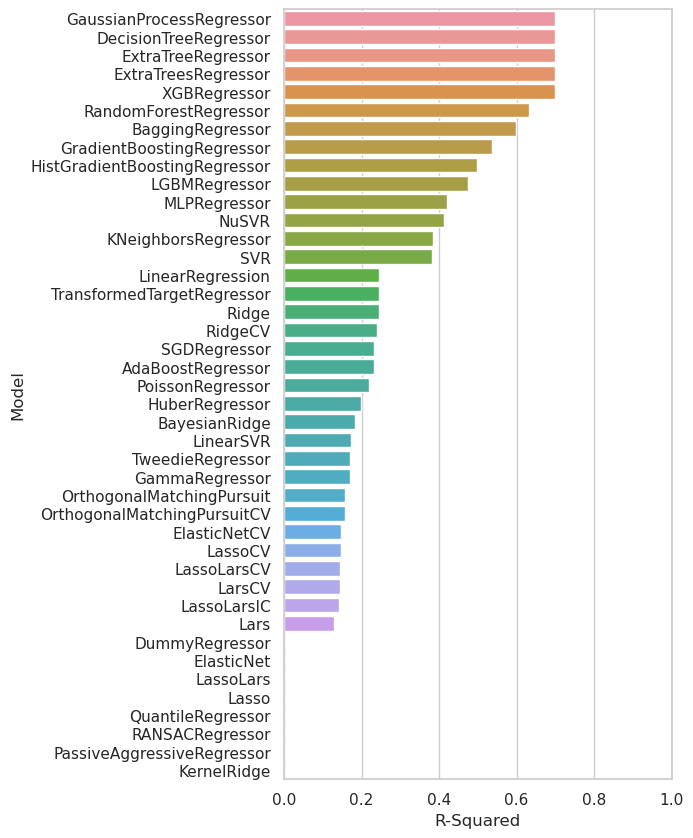

In [237]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize = (5, 10))
sns.set_theme(style = "whitegrid")
ax = sns.barplot(y = predictions_train.index, x = "R-Squared", data = predictions_train)
ax.set(xlim = (0, 1))

[(0.0, 10.0)]

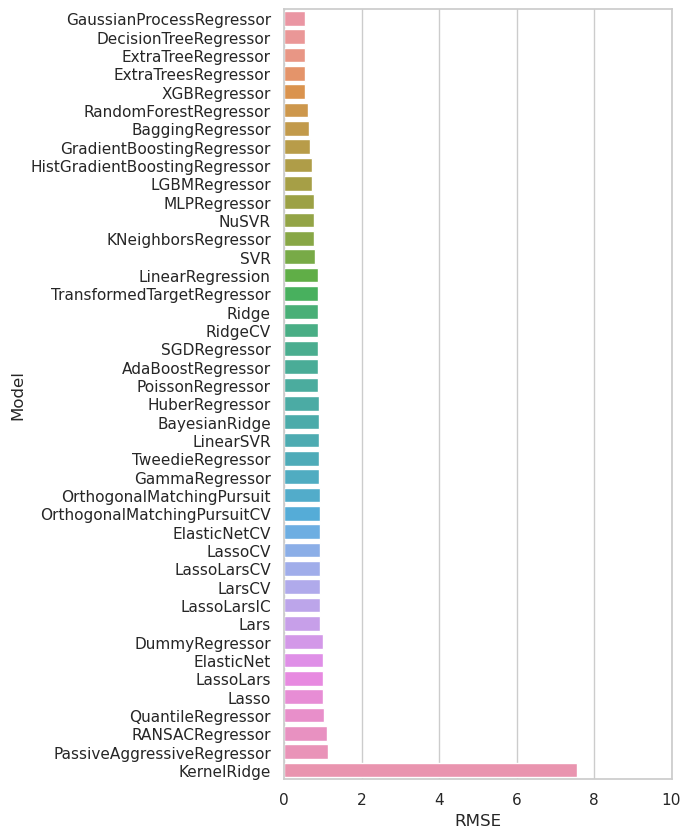

In [238]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (5, 10))
sns.set_theme(style = "whitegrid")
ax = sns.barplot(y = predictions_train.index, x = "RMSE", data=predictions_train)
ax.set(xlim = (0, 10))

[(0.0, 10.0)]

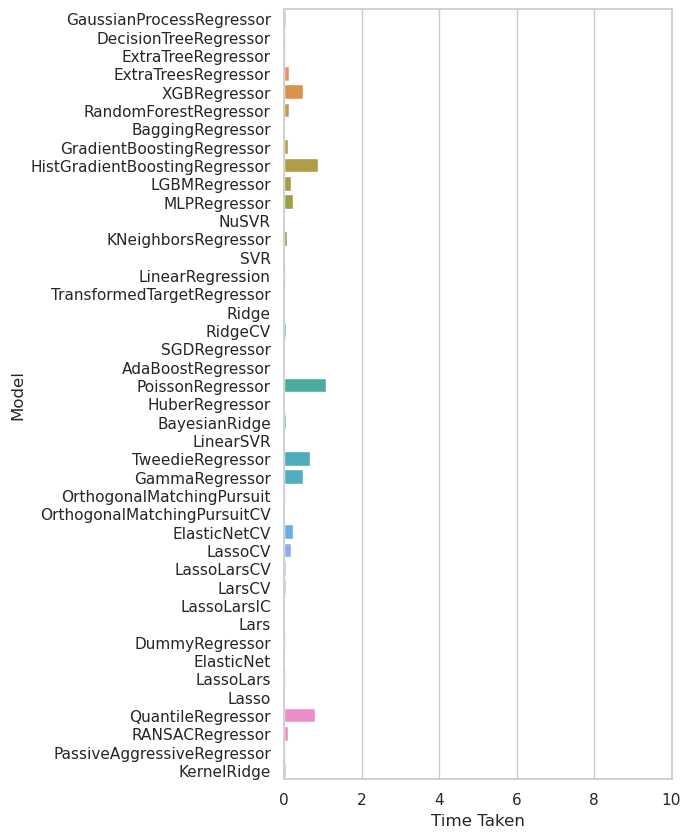

In [239]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (5, 10))
sns.set_theme(style = "whitegrid")
ax = sns.barplot(y = predictions_train.index, x = "Time Taken", data = predictions_train)
ax.set(xlim = (0, 10))